# Libraries

In [87]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [88]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN,KMeans,Birch,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.Network import *
pd.set_option('display.max_columns', None)

# Data Cleaning

In [89]:
df = pd.read_csv(r"../data/processed/UserProcessed.csv")
df.head()

,UserId,UserName,DisplayName,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,368,antgoldbloom,Anthony Goldbloom,0.333333,1.000000,7.935216e-21,0.173579,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1
1,381,iguyon,Isabelle,0.333333,0.012926,0.000000e+00,0.007540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123067,0.534590,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
2,389,anandjeyahar,Anand Jeyahar,0.000000,0.004479,7.935216e-21,0.004787,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010087,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,1
3,392,jmeynet,Julien Meynet,0.666667,0.006241,0.000000e+00,0.000177,0.731685,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020173,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
4,394,m4xl1n,m4xl1n,0.000000,0.000000,0.000000e+00,0.000000,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194147 entries, 0 to 194146
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   UserId                   194147 non-null  int64  
 1   UserName                 194147 non-null  object 
 2   DisplayName              194147 non-null  object 
 3   PerformanceTier          194147 non-null  float64
 4   pagerank_cent_followers  194147 non-null  float64
 5   eigenvector_cent_teams   194147 non-null  float64
 6   eigenvector_cent_forums  194147 non-null  float64
 7   TotalGold_Comp           194147 non-null  float64
 8   TotalSilver_Comp         194147 non-null  float64
 9   TotalBronze_Comp         194147 non-null  float64
 10  TotalGold_Scri           194147 non-null  float64
 11  TotalSilver_Scri         194147 non-null  float64
 12  TotalBronze_Scri         194147 non-null  float64
 13  TotalGold_Disc           194147 non-null  float64
 14  Tota

In [91]:
df.drop(columns=["UserId","UserName","DisplayName"],inplace=True)
df.head()

,PerformanceTier,pagerank_cent_followers,eigenvector_cent_teams,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_3Y,Flg_Creacion_3Y_5Y,Flg_Creacion_5Y_7Y,Flg_Creacion_7Y_9Y,Flg_Creacion_9Y
0,0.333333,1.000000,7.935216e-21,0.173579,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,1
1,0.333333,0.012926,0.000000e+00,0.007540,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.123067,0.534590,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
2,0.000000,0.004479,7.935216e-21,0.004787,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010087,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,1
3,0.666667,0.006241,0.000000e+00,0.000177,0.731685,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020173,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
4,0.000000,0.000000,0.000000e+00,0.000000,0.731685,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


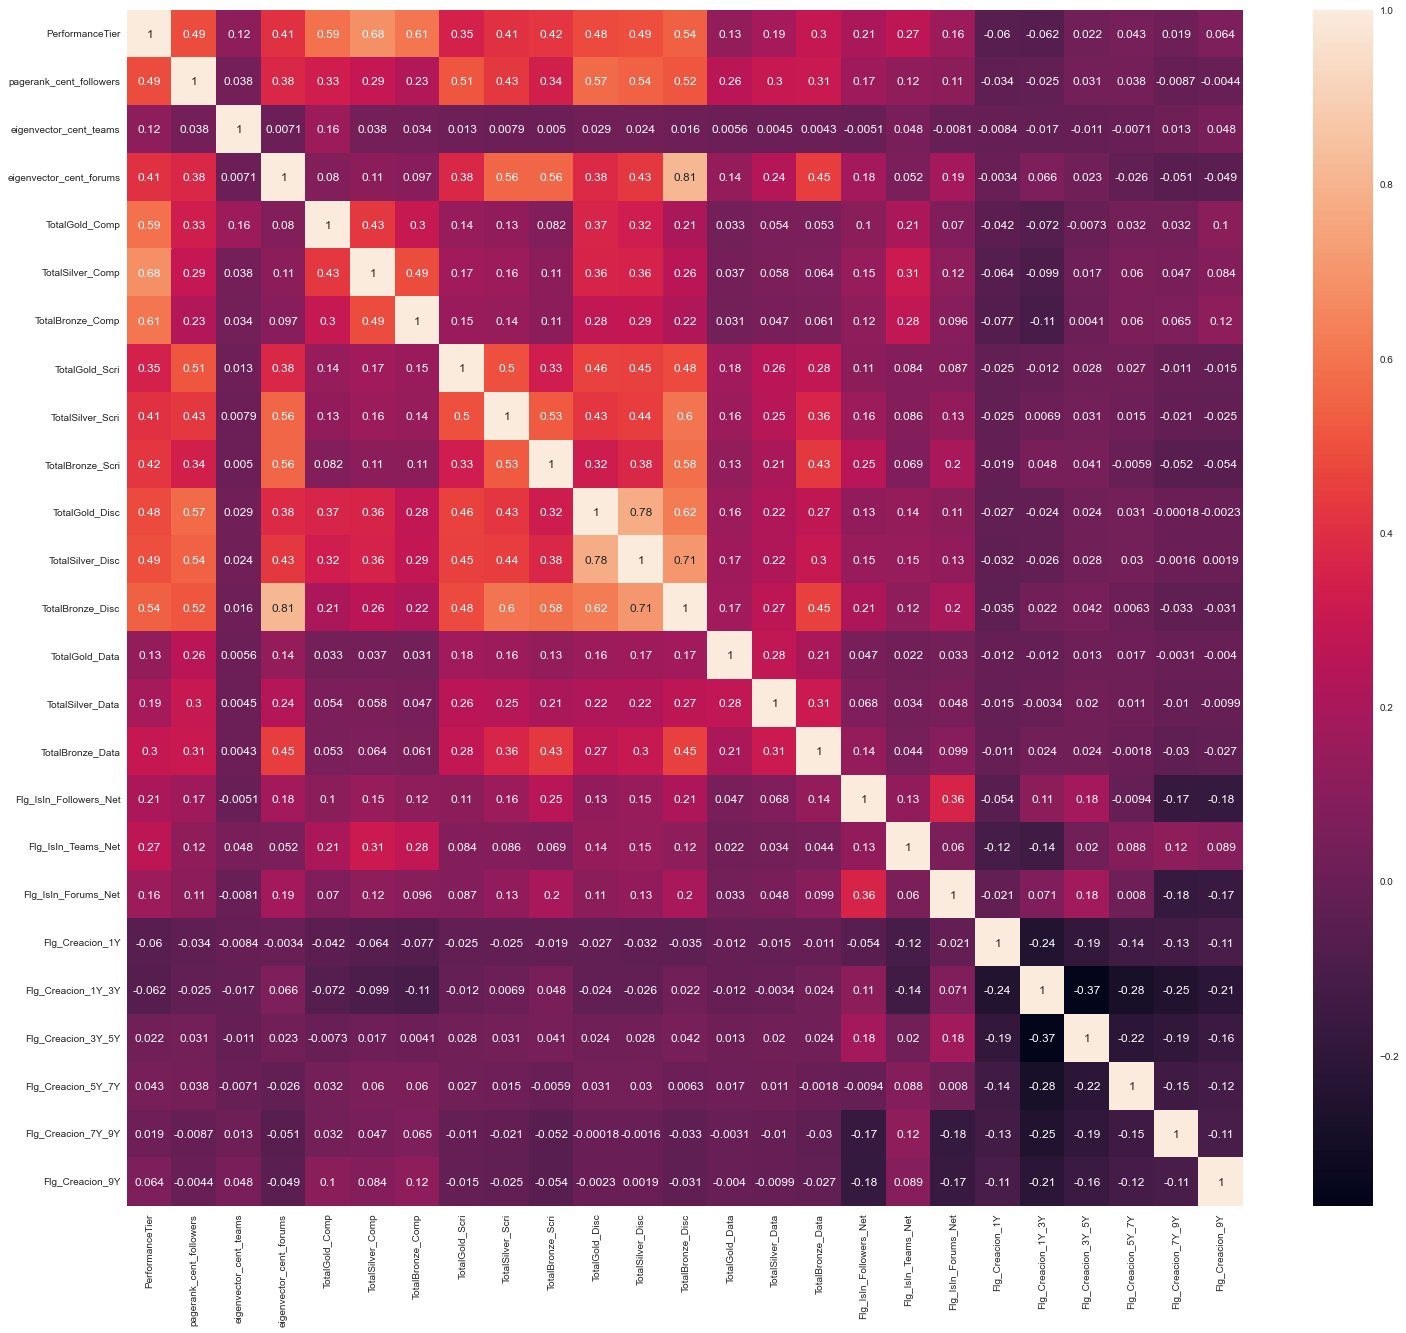

In [92]:
corrMatrix = df.corr()
plt.figure(figsize=[25,22])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [93]:
df.shape

(194147, 25)

# PCA

[0.23272906 0.1785675  0.11708818 0.10200374 0.0894338  0.07551492
 0.06382468 0.05087876 0.03167404 0.01909406]
La cantidad de PC que explican el 80 % de varianza: 6


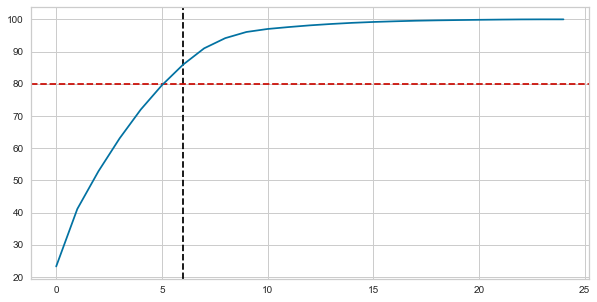

In [94]:
pca = PCA()
pca.fit(df)

#imprimir los valores de varianza de los 10 primeros PC
print(pca.explained_variance_ratio_[:10])

#acumular varianzas
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

#cuantas PC explican el 80% del dataset
k = np.argmax(var_cumu>80)
print("La cantidad de PC que explican el 80 % de varianza:",k)

plt.figure(figsize=[10,5])
plt.axvline(x=k, color='black', linestyle='--')
plt.axhline(y=80, color='r', linestyle='--')
ax = plt.plot(var_cumu)

In [95]:
print(pca.n_components_)

25


In [96]:
pca_t = PCA(n_components=6) #calculamos con 6 pues es el valor que nos da 95%
transf = pca_t.fit_transform(df) #transformamos del original (28) al nuevo de 6 perdiendo un 5%
df_pca = pd.DataFrame(data = transf, columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6'])
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,0.861274,0.423470,0.962889,0.071910,-0.279243,0.309140
1,0.527739,0.155889,0.103098,-0.133784,0.190686,0.259517
2,0.589215,0.375389,0.732470,0.038845,-0.250474,0.229940
3,0.576912,0.227902,0.273706,-0.114083,0.116454,0.279356
4,-0.807292,0.163328,-0.015938,0.076848,-0.001618,-0.009379


In [97]:
print('Explained variation per principal component: {}'.format(pca_t.explained_variance_ratio_))

Explained variation per principal component: [0.23272906 0.1785675  0.11708818 0.10200374 0.0894338  0.07551492]


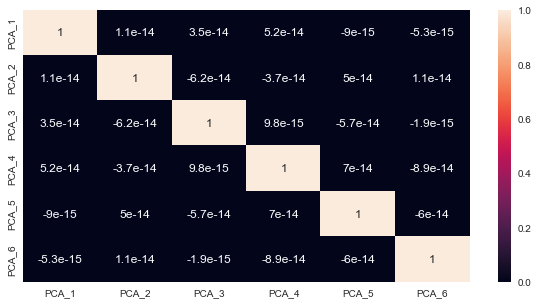

In [98]:
corrMatrix = df_pca.corr()
plt.figure(figsize=[10,5])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [99]:
df_pca.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
count,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05,1.941470e+05
mean,-7.173244e-17,-1.001326e-16,9.954706e-18,4.918796e-16,8.970947e-16,1.264833e-16
std,6.113313e-01,5.354915e-01,4.336186e-01,4.047244e-01,3.789677e-01,3.482312e-01
min,-8.621814e-01,-7.743744e-01,-7.620022e-01,-9.693025e-01,-1.008282e+00,-6.245669e-01
25%,-5.795045e-01,-7.451761e-01,-2.242020e-01,-3.037089e-01,-3.711416e-01,-1.985397e-01
50%,7.374222e-02,1.891234e-01,-2.121190e-02,7.150756e-02,1.580955e-02,-5.652181e-02
75%,6.112397e-01,4.611906e-01,1.903718e-01,2.071995e-01,2.508052e-01,8.032490e-02
max,1.400575e+00,9.542947e-01,1.610745e+00,1.079870e+00,1.059772e+00,9.150909e-01


In [100]:
df_pca_scaled = df_pca.copy()
#Escalamos la data numerica entre 0-1
scaler = MinMaxScaler()
df_pca_scaled[df_pca_scaled.columns] = scaler.fit_transform(df_pca_scaled[df_pca_scaled.columns])
df_pca_scaled.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
count,194147.000000,194147.000000,194147.000000,194147.000000,194147.000000,194147.000000
mean,0.381031,0.447960,0.321148,0.473021,0.487551,0.405653
std,0.270171,0.309771,0.182750,0.197506,0.183248,0.226174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.124926,0.016891,0.226657,0.324811,0.308087,0.276703
50%,0.413621,0.557364,0.312208,0.507917,0.495196,0.368942
75%,0.651162,0.714749,0.401380,0.574135,0.608827,0.457824
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# K-Means

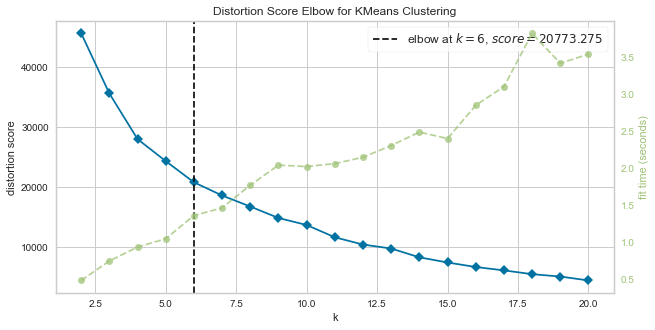

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
df_f_keans = df_pca_scaled.copy()

kmeans = KMeans(init='k-means++',random_state = 66)
plt.figure(figsize=[10,5])
elb_visualizer = KElbowVisualizer(kmeans, k=(2,21))
elb_visualizer.fit(df_f_keans)
elb_visualizer.show()

In [102]:
k_cluster = [5,6,7]
silhouette_list = []

for k in k_cluster:
    cluster_labels = KMeans(n_clusters=k, random_state = 66).fit_predict(df_f_keans)
    sil = silhouette_score(df_f_keans,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+str(sil))

silhouette for 5 calculated: 0.41157451143389767
silhouette for 6 calculated: 0.4323416404101636
silhouette for 7 calculated: 0.4362365100192786


In [103]:
cluster_labels_7 = KMeans(n_clusters=7, random_state = 66).fit_predict(df_f_keans)
df_f_keans_2 = df_f_keans.copy()
df_f_keans_2["cluster"] = cluster_labels_7

In [104]:
df_pre = pd.read_csv(r"../data/processed/UserPreProcessed.csv")
df_pre_kmeans = df_pre.copy()
df_pre_kmeans["cluster"] = df_f_keans_2["cluster"]
df_pre_kmeans["cluster"].value_counts()

1    32207
4    31688
6    29921
0    27683
3    27536
2    24232
5    20880
Name: cluster, dtype: int64

In [105]:
df_pre_kmeans["cluster"] = df_pre_kmeans["cluster"].astype(str)
df_pre_kmeans["Flg_Creacion"] = df_pre_kmeans["Flg_Creacion"].astype(str)
df_f_keans_2["cluster"] = df_f_keans_2["cluster"].astype(str)

In [106]:
df_f_keans_2.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,cluster
0,0.761662,0.692929,0.726960,0.508113,0.352524,0.606438,2
1,0.614260,0.538139,0.364598,0.407735,0.579757,0.574208,0
2,0.641429,0.665115,0.629849,0.491978,0.366435,0.554998,2
3,0.635991,0.579796,0.436502,0.417349,0.543862,0.587093,2
4,0.024258,0.542442,0.314430,0.510523,0.486769,0.399561,6


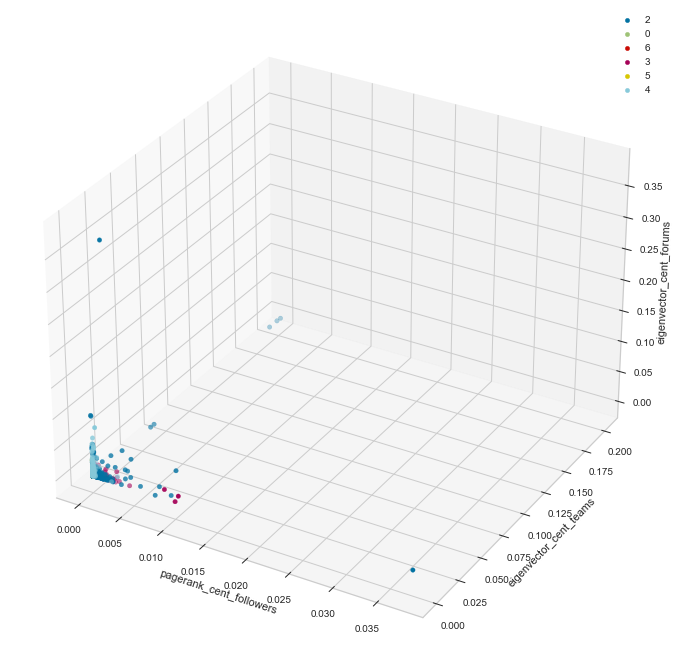

In [107]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df_pre_kmeans["cluster"] = df_pre_kmeans["cluster"].astype(str)

xs = "pagerank_cent_followers"
ys = "eigenvector_cent_teams"
zs = "eigenvector_cent_forums"

for s in df_pre_kmeans.cluster.unique():
    if s!="1":
        df_tmp = df_pre_kmeans[df_pre_kmeans["cluster"]==s]
        ax.scatter(df_tmp[xs],df_tmp[ys],df_tmp[zs],label=s)
ax.set_xlabel(xs)
ax.set_ylabel(ys)
ax.set_zlabel(zs)
ax.legend()
plt.show()

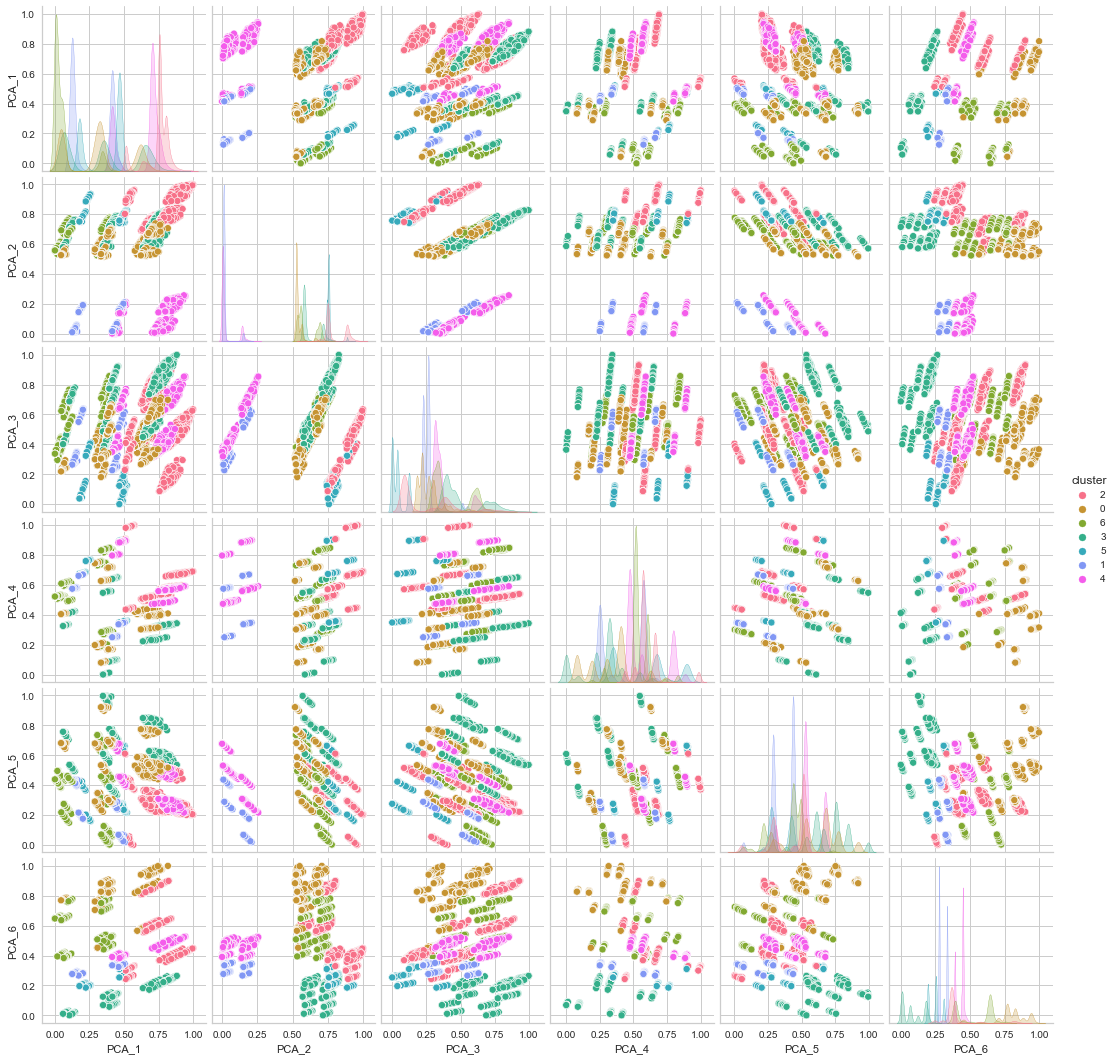

In [108]:
sns.pairplot(df_f_keans_2, hue='cluster')
plt.show()

In [111]:
df_f_kmeans_2_c1 = df_pre_kmeans[df_pre_kmeans["cluster"]=="0"]
df_f_kmeans_2_c2 = df_pre_kmeans[df_pre_kmeans["cluster"]=="1"]
df_f_kmeans_2_c3 = df_pre_kmeans[df_pre_kmeans["cluster"]=="2"]
df_f_kmeans_2_c4 = df_pre_kmeans[df_pre_kmeans["cluster"]=="3"]
df_f_kmeans_2_c5 = df_pre_kmeans[df_pre_kmeans["cluster"]=="4"]
df_f_kmeans_2_c6 = df_pre_kmeans[df_pre_kmeans["cluster"]=="5"]
df_f_kmeans_2_c7 = df_pre_kmeans[df_pre_kmeans["cluster"]=="6"]

In [126]:
cols_num = df_f_kmeans_2_c1.columns[3:].tolist()
cols_num.remove('Flg_Creacion')
cols_num.remove('cluster')

cols_cat = ["Flg_Creacion"]

In [132]:
df_pre_kmeans["Flg_Creacion"].value_counts()

1Y_3Y    63895
3Y_5Y    42853
5Y_7Y    27536
7Y_9Y    22475
1Y       21108
9Y       16280
Name: Flg_Creacion, dtype: int64

In [143]:
df_pre_kmeans["cluster"].value_counts()

1    32207
4    31688
6    29921
0    27683
3    27536
2    24232
5    20880
Name: cluster, dtype: int64

In [129]:
df_f_kmeans_2_c1["Flg_Creacion"].value_counts()

1Y       20905
7Y_9Y     4682
9Y        2096
Name: Flg_Creacion, dtype: int64

In [127]:
#Contribuidor de foro pasivo
Validator.validar_numerico(df_f_kmeans_2_c1,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,27683,0,0.00,0,0.0,4,1.04,1.0,4.00,1.0,1.72,1.0,1.0,1.0,1.0,2.00,1118,4.04,1118,4.04,1118,4.04,1118,4.04,102,0.37
0,in_degree_followers,27683,17591,63.54,0,0.0,101,2.77,0.0,516.00,5.0,46.67,1.0,2.0,4.0,10.0,37.00,832,3.01,71,0.26,991,3.58,454,1.64,97,0.35
0,out_degree_followers,27683,17591,63.54,0,0.0,95,3.71,0.0,297.00,6.0,34.60,1.0,3.0,8.0,14.0,40.09,1271,4.59,129,0.47,957,3.46,496,1.79,101,0.36
0,in_degree_cent_followers,27683,17591,63.54,0,0.0,101,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,832,3.01,71,0.26,991,3.58,454,1.64,97,0.35
0,pagerank_cent_followers,27683,17591,63.54,0,0.0,3123,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1414,5.11,40,0.14,893,3.23,505,1.82,101,0.36
0,degree_teams,27683,26468,95.61,0,0.0,21,3.06,1.0,25.00,8.5,10.60,3.0,4.0,5.0,8.0,13.00,35,0.13,24,0.09,121,0.44,35,0.13,12,0.04
0,degree_cent_teams,27683,26468,95.61,0,0.0,21,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,35,0.13,24,0.09,121,0.44,35,0.13,12,0.04
0,eigenvector_cent_teams,27683,26468,95.61,0,0.0,256,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,302,1.09,1,0.00,122,0.44,61,0.22,13,0.05
0,degree_forums,27683,11291,40.79,0,0.0,519,55.78,2.0,4652.00,148.0,395.61,22.0,64.0,146.0,198.0,427.00,1569,5.67,187,0.68,1637,5.91,792,2.86,163,0.59
0,degree_cent_forums,27683,11291,40.79,0,0.0,519,0.00,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1569,5.67,187,0.68,1653,5.97,792,2.86,163,0.59


In [130]:
df_f_kmeans_2_c2["Flg_Creacion"].value_counts()

1Y_3Y    32207
Name: Flg_Creacion, dtype: int64

In [131]:
#Competidor principiante
Validator.validar_numerico(df_f_kmeans_2_c2,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,32207,0,0.00,0,0.0,2,1.01,1.0,2.00,1.0,1.31,1.0,1.0,1.0,1.00,1.00,315,0.98,315,0.98,315,0.98,315,0.98,315,0.98
0,in_degree_followers,32207,32207,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,out_degree_followers,32207,32207,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,in_degree_cent_followers,32207,32207,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,pagerank_cent_followers,32207,32207,100.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
0,degree_teams,32207,30200,93.77,0,0.0,18,2.71,1.0,25.00,8.5,9.56,2.0,4.0,5.0,7.00,12.00,53,0.16,39,0.12,168,0.52,83,0.26,17,0.05
0,degree_cent_teams,32207,30200,93.77,0,0.0,18,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,53,0.16,39,0.12,168,0.52,83,0.26,17,0.05
0,eigenvector_cent_teams,32207,30200,93.77,0,0.0,312,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,458,1.42,18,0.06,201,0.62,101,0.31,21,0.07
0,degree_forums,32207,17929,55.67,0,0.0,311,48.84,2.0,1261.00,155.5,230.31,24.0,67.0,134.0,183.15,229.23,1096,3.40,119,0.37,1421,4.41,714,2.22,143,0.44
0,degree_cent_forums,32207,17929,55.67,0,0.0,311,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.00,0.00,1096,3.40,119,0.37,1421,4.41,714,2.22,143,0.44


In [133]:
df_f_kmeans_2_c3["Flg_Creacion"].value_counts()

3Y_5Y    21973
7Y_9Y     1371
9Y         888
Name: Flg_Creacion, dtype: int64

In [134]:
#Lider y Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_f_kmeans_2_c3,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,24232,0,0.00,0,0.0,4,1.25,1.0,4.00,1.0,2.96,1.0,1.0,2.0,3.0,3.00,4666,19.26,1230,5.08,1230,5.08,213,0.88,213,0.88
0,in_degree_followers,24232,1235,5.10,0,0.0,389,17.09,0.0,16840.00,7.5,731.46,1.0,3.0,12.0,30.0,207.00,3250,13.41,83,0.34,2264,9.34,1144,4.72,229,0.95
0,out_degree_followers,24232,1235,5.10,0,0.0,190,6.33,0.0,2136.00,11.0,79.47,2.0,5.0,14.0,24.0,67.00,2823,11.65,167,0.69,2143,8.84,1122,4.63,227,0.94
0,in_degree_cent_followers,24232,1235,5.10,0,0.0,389,0.00,0.0,0.07,0.0,0.00,0.0,0.0,0.0,0.0,0.00,3250,13.41,83,0.34,2264,9.34,1144,4.72,229,0.95
0,pagerank_cent_followers,24232,1235,5.10,0,0.0,10310,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.00,3065,12.65,62,0.26,2300,9.49,1150,4.75,230,0.95
0,degree_teams,24232,13431,55.43,0,0.0,64,3.85,1.0,133.00,8.5,20.46,2.0,4.0,8.0,12.0,28.00,914,3.77,194,0.80,914,3.77,471,1.94,105,0.43
0,degree_cent_teams,24232,13431,55.43,0,0.0,64,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,914,3.77,194,0.80,914,3.77,471,1.94,105,0.43
0,eigenvector_cent_teams,24232,13431,55.43,0,0.0,2452,0.00,0.0,0.20,0.0,0.01,0.0,0.0,0.0,0.0,0.00,2629,10.85,6,0.02,1080,4.46,540,2.23,108,0.45
0,degree_forums,24232,1233,5.09,0,0.0,1177,121.26,2.0,15622.00,275.5,1061.51,41.0,118.0,253.0,449.0,1305.02,2069,8.54,352,1.45,2292,9.46,1147,4.73,230,0.95
0,degree_cent_forums,24232,1233,5.09,0,0.0,1177,0.00,0.0,0.15,0.0,0.01,0.0,0.0,0.0,0.0,0.01,2069,8.54,352,1.45,2292,9.46,1147,4.73,230,0.95


In [135]:
df_f_kmeans_2_c4["Flg_Creacion"].value_counts()

5Y_7Y    27536
Name: Flg_Creacion, dtype: int64

In [136]:
#Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_f_kmeans_2_c4,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,27536,0,0.00,0,0.0,4,1.12,1.0,4.00,1.0,2.32,1.0,1.0,1.0,2.0,3.00,2646,9.61,537,1.95,2646,9.61,537,1.95,107,0.39
0,in_degree_followers,27536,16249,59.01,0,0.0,280,17.36,0.0,13216.00,7.5,658.12,1.0,3.0,12.0,30.0,253.28,1572,5.71,48,0.17,1104,4.01,562,2.04,113,0.41
0,out_degree_followers,27536,16249,59.01,0,0.0,136,5.80,0.0,564.00,11.0,58.84,2.0,5.0,13.0,23.0,63.14,1296,4.71,131,0.48,1090,3.96,539,1.96,113,0.41
0,in_degree_cent_followers,27536,16249,59.01,0,0.0,280,0.00,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1572,5.71,48,0.17,1104,4.01,562,2.04,113,0.41
0,pagerank_cent_followers,27536,16249,59.01,0,0.0,5027,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1599,5.81,51,0.19,1129,4.10,565,2.05,113,0.41
0,degree_teams,27536,19592,71.15,0,0.0,51,3.44,1.0,74.00,8.5,17.26,2.0,4.0,7.0,11.0,23.00,554,2.01,156,0.57,691,2.51,345,1.25,79,0.29
0,degree_cent_teams,27536,19592,71.15,0,0.0,51,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,554,2.01,156,0.57,691,2.51,345,1.25,79,0.29
0,eigenvector_cent_teams,27536,19592,71.15,0,0.0,1403,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1865,6.77,96,0.35,795,2.89,398,1.45,80,0.29
0,degree_forums,27536,12900,46.85,0,0.0,832,98.25,2.0,6756.00,230.0,826.15,33.0,98.0,210.0,359.0,1048.65,1271,4.62,233,0.85,1459,5.30,731,2.65,147,0.53
0,degree_cent_forums,27536,12900,46.85,0,0.0,832,0.00,0.0,0.07,0.0,0.01,0.0,0.0,0.0,0.0,0.01,1271,4.62,233,0.85,1459,5.30,731,2.65,147,0.53


In [137]:
df_f_kmeans_2_c5["Flg_Creacion"].value_counts()

1Y_3Y    31688
Name: Flg_Creacion, dtype: int64

In [138]:
#Contribuidor de foro antiguo y competidor
Validator.validar_numerico(df_f_kmeans_2_c5,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,31688,0,0.00,0,0.0,4,1.10,1.0,4.00,1.0,2.11,1.0,1.0,1.0,2.0,2.00,2891,9.12,301,0.95,2891,9.12,301,0.95,301,0.95
0,in_degree_followers,31688,0,0.00,0,0.0,213,4.41,0.0,9026.00,5.0,187.47,1.0,2.0,6.0,13.0,57.00,3523,11.12,66,0.21,3049,9.62,1566,4.94,315,0.99
0,out_degree_followers,31688,0,0.00,0,0.0,164,4.97,0.0,2756.00,8.5,67.89,2.0,4.0,11.0,19.0,50.00,4129,13.03,181,0.57,2976,9.39,1492,4.71,314,0.99
0,in_degree_cent_followers,31688,0,0.00,0,0.0,213,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.00,3523,11.12,66,0.21,3049,9.62,1566,4.94,315,0.99
0,pagerank_cent_followers,31688,0,0.00,0,0.0,10788,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,3548,11.20,56,0.18,3169,10.00,1584,5.00,317,1.00
0,degree_teams,31688,25935,81.84,0,0.0,37,3.21,1.0,68.00,8.5,13.56,2.0,4.0,6.0,9.0,17.00,317,1.00,103,0.33,539,1.70,256,0.81,57,0.18
0,degree_cent_teams,31688,25935,81.84,0,0.0,37,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,317,1.00,103,0.33,539,1.70,317,1.00,57,0.18
0,eigenvector_cent_teams,31688,25935,81.84,0,0.0,1025,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1429,4.51,45,0.14,576,1.82,288,0.91,58,0.18
0,degree_forums,31688,9378,29.59,0,0.0,1060,102.67,2.0,4920.00,238.5,805.21,34.0,102.0,220.0,398.0,1149.91,1965,6.20,430,1.36,2221,7.01,1115,3.52,224,0.71
0,degree_cent_forums,31688,9378,29.59,0,0.0,1060,0.00,0.0,0.05,0.0,0.01,0.0,0.0,0.0,0.0,0.01,1965,6.20,430,1.36,2221,7.01,1115,3.52,224,0.71


In [139]:
df_f_kmeans_2_c6["Flg_Creacion"].value_counts()

3Y_5Y    20880
Name: Flg_Creacion, dtype: int64

In [140]:
Validator.validar_numerico(df_f_kmeans_2_c6,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,20880,0,0.00,0,0.0,3,1.02,1.0,3.00,1.0,1.39,1.0,1.0,1.0,1.0,2.0,322,1.54,322,1.54,322,1.54,322,1.54,1,0.00
0,in_degree_followers,20880,16323,78.18,0,0.0,31,1.33,0.0,511.00,2.5,31.33,1.0,1.0,3.0,4.0,11.0,490,2.35,9,0.04,310,1.48,204,0.98,44,0.21
0,out_degree_followers,20880,16323,78.18,0,0.0,48,2.66,0.0,281.00,6.0,21.88,1.0,3.0,6.0,10.0,25.0,380,1.82,58,0.28,380,1.82,196,0.94,41,0.20
0,in_degree_cent_followers,20880,16323,78.18,0,0.0,31,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,490,2.35,9,0.04,310,1.48,204,0.98,44,0.21
0,pagerank_cent_followers,20880,16323,78.18,0,0.0,1173,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,462,2.21,18,0.09,456,2.18,228,1.09,46,0.22
0,degree_teams,20880,20275,97.10,0,0.0,13,2.42,1.0,22.00,6.0,8.55,2.0,3.0,5.0,7.0,10.0,33,0.16,13,0.06,39,0.19,18,0.09,3,0.01
0,degree_cent_teams,20880,20275,97.10,0,0.0,13,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,33,0.16,13,0.06,39,0.19,18,0.09,3,0.01
0,eigenvector_cent_teams,20880,20275,97.10,0,0.0,72,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,116,0.56,5,0.02,61,0.29,31,0.15,7,0.03
0,degree_forums,20880,12167,58.27,0,0.0,291,47.84,2.0,668.00,150.5,222.52,25.0,65.0,127.0,174.0,243.0,658,3.15,129,0.62,857,4.10,405,1.94,75,0.36
0,degree_cent_forums,20880,12167,58.27,0,0.0,291,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,658,3.15,129,0.62,857,4.10,405,1.94,93,0.45


In [141]:
df_f_kmeans_2_c7["Flg_Creacion"].value_counts()

7Y_9Y    16422
9Y       13296
1Y         203
Name: Flg_Creacion, dtype: int64

In [142]:
Validator.validar_numerico(df_f_kmeans_2_c7,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,29921,0,0.00,0,0.0,4,1.06,1.0,4.00,1.0,1.91,1.0,1.0,1.0,2.0,2.00,1654,5.53,1654,5.53,1654,5.53,274,0.92,274,0.92
0,in_degree_followers,29921,28749,96.08,0,0.0,28,2.24,0.0,328.00,1.0,36.29,1.0,1.0,3.0,6.0,20.00,573,1.92,10,0.03,105,0.35,47,0.16,11,0.04
0,out_degree_followers,29921,28749,96.08,0,0.0,26,1.43,0.0,112.00,2.5,17.54,0.0,1.0,3.0,6.0,17.58,136,0.45,12,0.04,102,0.34,58,0.19,12,0.04
0,in_degree_cent_followers,29921,28749,96.08,0,0.0,28,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,573,1.92,10,0.03,105,0.35,47,0.16,11,0.04
0,pagerank_cent_followers,29921,28749,96.08,0,0.0,429,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,138,0.46,7,0.02,117,0.39,59,0.20,12,0.04
0,degree_teams,29921,19134,63.95,0,0.0,42,2.99,1.0,65.00,6.0,14.80,2.0,3.0,5.0,8.0,23.00,782,2.61,175,0.58,1047,3.50,506,1.69,103,0.34
0,degree_cent_teams,29921,19134,63.95,0,0.0,42,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,782,2.61,175,0.58,1047,3.50,506,1.69,103,0.34
0,eigenvector_cent_teams,29921,19134,63.95,0,0.0,918,0.00,0.0,0.23,0.0,0.03,0.0,0.0,0.0,0.0,0.00,2586,8.64,39,0.13,1082,3.62,540,1.80,108,0.36
0,degree_forums,29921,27965,93.46,0,0.0,204,34.51,2.0,573.00,88.5,188.51,15.0,39.0,95.0,133.0,229.90,216,0.72,42,0.14,192,0.64,97,0.32,20,0.07
0,degree_cent_forums,29921,27965,93.46,0,0.0,204,0.00,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.00,216,0.72,42,0.14,192,0.64,97,0.32,20,0.07


# DB SCAN

In [15]:
df_dbscan = df_pca_scaled.copy()
df_dbscan.shape

(194147, 5)

In [16]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=2000).fit(df_dbscan)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_dbscan)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

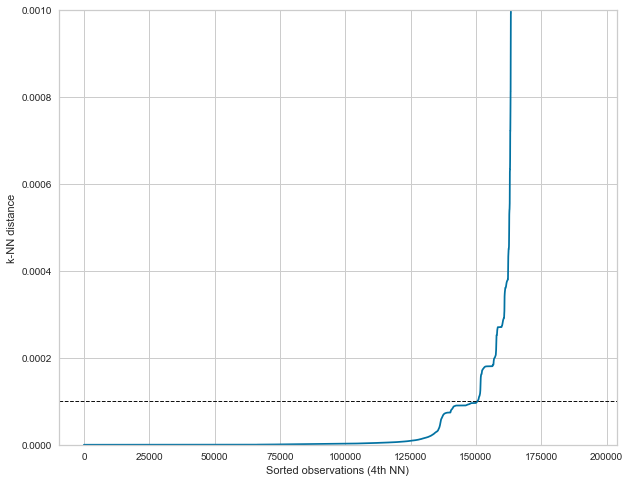

In [17]:
k_dist = sort_neigh_dist[:, 1999]
plt.figure(figsize=[10,8])
plt.plot(k_dist)
plt.axhline(y=0.0001, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.ylim([0, 0.001])
plt.show()

Epislon = 0.00015 and MinPoints = 5 for DB SCAN

In [22]:
dbscan = DBSCAN(eps = 0.0003, min_samples = 1500).fit(df_dbscan) # fitting the model
labels = dbscan.labels_ # getting the labels

In [23]:
df_dbscan_2 = df_dbscan.copy()
df_dbscan_2["cluster"] = labels

In [24]:
df_pre = pd.read_csv(r"../data/processed/UserPreProcessed.csv")
df_pre_dbscan = df_pre.copy()
df_pre_dbscan["cluster"] = df_dbscan_2["cluster"]
df_pre_dbscan["cluster"].value_counts()

-1     27931
 21    17146
 20    16318
 17    12962
 13    12186
 4     10121
 14     8607
 22     8184
 0      8061
 18     8036
 7      7886
 12     6946
 24     5038
 11     4629
 10     4564
 16     4477
 5      4392
 15     4287
 23     4019
 19     3282
 2      3014
 9      2339
 3      2276
 6      2132
 25     2120
 8      1648
 1      1546
Name: cluster, dtype: int64

In [25]:
df_pre_dbscan.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,cluster
0,368,antgoldbloom,Anthony Goldbloom,2,9Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,5.427340e-23,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,-1
1,381,iguyon,Isabelle,2,9Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,-1
2,389,anandjeyahar,Anand Jeyahar,1,9Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,5.427340e-23,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1
3,392,jmeynet,Julien Meynet,3,9Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-1
4,394,m4xl1n,m4xl1n,1,9Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['-1' '-1' '-1' ... '-1' '-1' '-1']

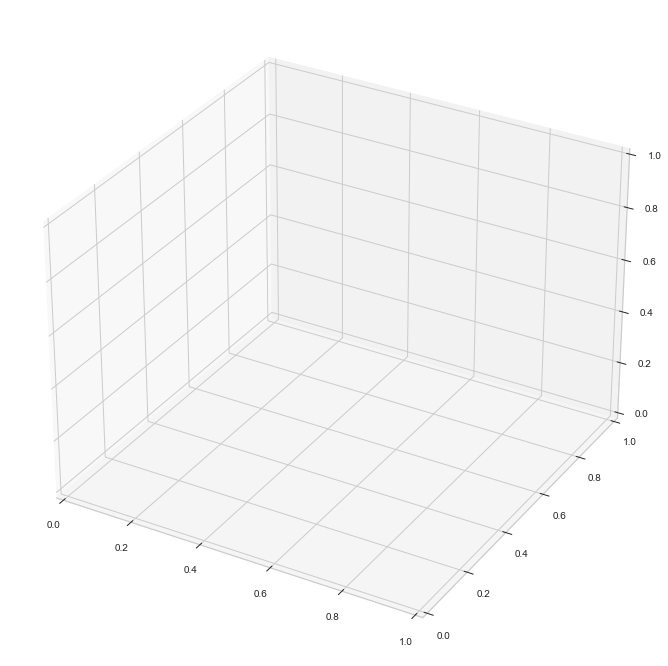

In [34]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

df_pre_dbscan["cluster"] = df_pre_dbscan["cluster"].astype(str)

ax.scatter(df_pre_dbscan["pagerank_cent_followers"], df_pre_dbscan["eigenvector_cent_teams"],df_pre_dbscan["eigenvector_cent_forums"],s=40,marker='o',alpha=1,c=df_pre_dbscan["cluster"])
plt.show()

# AgglomerativeClustering

df_birch = df_pca_scaled.copy()

bclust=Birch(branching_factor = 50, n_clusters = None, threshold = 0.5)

df_birch_2 = df_birch.copy()
df_birch_2["cluster"] = bclust.fit_predict(df_birch) # getting the labels
df_birch_2["cluster"].value_counts()


In [43]:
df_aglo = df_pca_scaled.copy()
df_aglo.shape

(194147, 5)

In [47]:
df_aglo_sample = df_aglo.sample(n=10000,random_state=66)
df_aglo_sample.shape

(10000, 5)

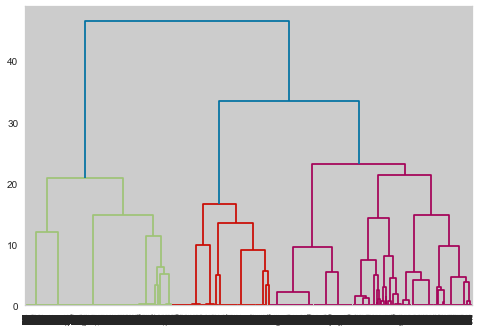

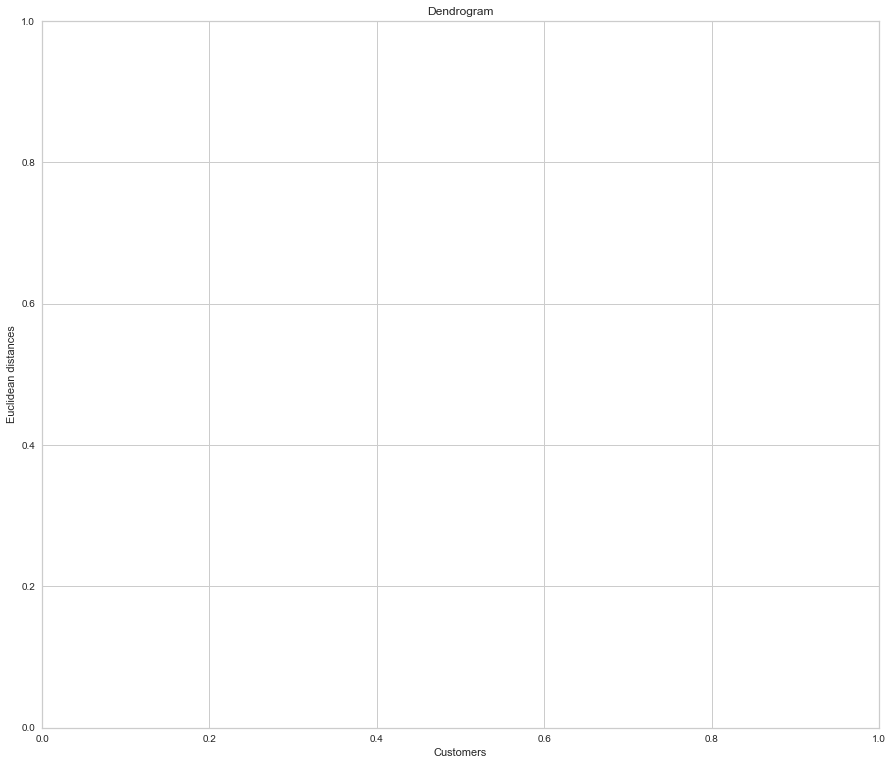

In [49]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_aglo_sample, method  = "ward"))
plt.figure(figsize=[15,13])
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [30]:
silhouette_list = []

for k in range(2,11):
    cluster_labels = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit_predict(df_aglo_sample)
    sil = silhouette_score(df_aglo_sample,cluster_labels)
    silhouette_list.append(sil)
    print("silhouette for "+str(k)+" calculated: "+ str(sil))

silhouette for 2 calculated: 0.29723046769820194
